In [1]:
import pandas as pd
import numpy as np

from backtesting.test import SMA
from backtesting import Strategy
from backtesting.lib import crossover

from matplotlib import pyplot as plt

C:\Users\lexik\.conda\envs\quant\lib\site-packages\backtesting\_plotting.py:44: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
import hurst

In [37]:
import rwi

In [3]:
def mkCap_preparation(path, period_start, period_end):

    marketCap  = pd.read_excel(path,  sheet_name=1) # load marketCap edited data
    marketCap.T.index
    marketCap = marketCap.T.drop(['CompanyID', 'FactsetCode'])
    marketCap.columns=marketCap.loc['CompanyStockCode']
    marketCap = marketCap.drop('CompanyStockCode')
    marketCap.index = pd.to_datetime(marketCap.index, yearfirst=True)
    marketCap = marketCap.loc[period_start:period_end,:]
    marketCap.columns = marketCap.columns.astype('int')
    marketCap = marketCap.reindex(columns =sorted(marketCap.columns))

    range_df = pd.date_range(start=period_start, end=period_end)
    range_df = pd.DataFrame(range_df, columns=['Date']).set_index('Date')
    marketCap  = range_df.join(marketCap) #.fillna(method='ffill')
    marketCap[30] = marketCap[316140]
    return marketCap

In [4]:
period_start = '2016-09-30'
period_end = '2019-12-24'
marketCap = mkCap_preparation('marketCap_daily.xlsx', period_start, period_end)

In [18]:
marketCap  = pd.read_excel('marketCap_daily.xlsx',  sheet_name=1)

In [19]:
marketCap

,CompanyID,CompanyStockCode,FactsetCode,42001,42002,42003,42004,42005,42006,42007,...,43815,43816,43817,43818,43819,43820,43821,43822,43823,43830
0,1819.0,30,000030-KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1493.0,50,000050-KR,4.852503e+05,4.989579e+05,4.989579e+05,4.989579e+05,4.989579e+05,5.140363e+05,5.140363e+05,...,2.653798e+05,2.738785e+05,2.714112e+05,2.656540e+05,2.631866e+05,2.631866e+05,2.631866e+05,2.631866e+05,2.596226e+05,2.596226e+05
2,1484.0,70,000070-KR,7.426953e+05,7.402441e+05,7.682151e+05,7.682151e+05,7.682151e+05,7.690715e+05,7.690715e+05,...,5.515391e+05,5.549648e+05,5.566776e+05,5.541083e+05,5.489698e+05,5.489698e+05,5.489698e+05,5.541083e+05,5.626726e+05,5.626726e+05
3,764.0,80,000080-KR,1.746327e+06,1.637620e+06,1.630606e+06,1.630606e+06,1.630606e+06,1.585019e+06,1.585019e+06,...,1.914647e+06,1.897114e+06,1.963741e+06,1.939194e+06,1.935688e+06,1.935688e+06,1.935688e+06,1.949714e+06,1.970754e+06,1.970754e+06
4,1490.0,100,000100-KR,1.923814e+06,1.918238e+06,1.890356e+06,1.890356e+06,1.890356e+06,1.884780e+06,1.884780e+06,...,2.996233e+06,3.015399e+06,3.015399e+06,3.040953e+06,3.085673e+06,3.085673e+06,3.085673e+06,3.111228e+06,3.092062e+06,3.092062e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,1221.0,282690,282690-KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.668561e+05,1.689161e+05,1.689161e+05,1.675428e+05,1.675428e+05,1.675428e+05,1.675428e+05,1.682294e+05,1.689161e+05,1.689161e+05
713,1939.0,284740,284740-KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.446116e+05,9.591959e+05,9.591959e+05,9.670489e+05,9.715364e+05,9.715364e+05,9.715364e+05,9.524647e+05,9.524647e+05,9.524647e+05
714,1365.0,285130,285130-KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.279666e+05,7.150510e+05,7.103545e+05,7.115286e+05,7.103545e+05,7.103545e+05,7.103545e+05,7.173993e+05,7.408821e+05,7.408821e+05
715,1940.0,950160,950160-KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
marketCap.T.index
marketCap = marketCap.T.drop(['CompanyID', 'FactsetCode'])
marketCap.columns=marketCap.loc['CompanyStockCode']
marketCap = marketCap.drop('CompanyStockCode')
#marketCap.index = pd.to_datetime(marketCap.index, yearfirst=False)

In [23]:
marketCap[5930].shape

(1824,)

In [25]:
1724-365

1359

In [27]:
marketCap = marketCap.reset_index(drop=True)

In [28]:
marketCap

CompanyStockCode,30,50,70,80,100,120,140,150,210,230,...,272450,272550,280360,281820,282330,282690,284740,285130,950160,316140
0,NaN,485250,742695,1.74633e+06,1.92381e+06,4.32294e+06,294726,2.42488e+06,2.27244e+06,382288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.43906e+06
1,NaN,498958,740244,1.63762e+06,1.91824e+06,4.33435e+06,283123,2.23344e+06,2.28288e+06,378528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.93185e+06
2,NaN,498958,768215,1.63061e+06,1.89036e+06,4.47122e+06,283123,2.20154e+06,2.28984e+06,377274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.76278e+06
3,NaN,498958,768215,1.63061e+06,1.89036e+06,4.47122e+06,283123,2.20154e+06,2.28984e+06,377274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.76278e+06
4,NaN,498958,768215,1.63061e+06,1.89036e+06,4.47122e+06,283123,2.20154e+06,2.28984e+06,377274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.76278e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,NaN,263187,548970,1.93569e+06,3.08567e+06,3.50169e+06,300528,1.16493e+06,3.18768e+06,124879,...,474000,224515,946466,444401,2.81728e+06,167543,971536,710354,NaN,8.66721e+06
1820,NaN,263187,548970,1.93569e+06,3.08567e+06,3.50169e+06,300528,1.16493e+06,3.18768e+06,124879,...,474000,224515,946466,444401,2.81728e+06,167543,971536,710354,NaN,8.66721e+06
1821,NaN,263187,554108,1.94971e+06,3.11123e+06,3.45607e+06,298207,1.17319e+06,3.18768e+06,121579,...,493500,225936,956091,441425,2.86049e+06,168229,952465,717399,NaN,8.77555e+06
1822,NaN,259623,562673,1.97075e+06,3.09206e+06,3.42185e+06,295886,1.17319e+06,3.1668e+06,120478,...,468000,223804,940049,444401,2.86049e+06,168916,952465,740882,NaN,8.70333e+06


In [51]:
res = []

In [53]:
for code in marketCap.columns.tolist():
    try:
        hurst_val = rwi.hurstF(marketCap.iloc[1358:1723][code].values)
    except:
        continue
    res.append((code, hurst_val))
    

In [54]:
rwi.hurstF(marketCap.iloc[1358:1723][5930].values)

0.5383138191679999

In [60]:
df = pd.DataFrame(res) #.hist(bins=50)

In [62]:
df.sort_values(by=[1])

,0,1
324,18120,0.220990
124,30200,0.272343
687,271980,0.272945
5,140,0.275730
333,23590,0.285375
...,...,...
555,114120,0.627902
479,72710,0.632622
682,267260,0.642416
416,44340,0.646004


In [183]:
a = marketCap[[44340]]

In [184]:
b = marketCap[[30200]]

In [185]:
a = a.rename(columns={44340:'price'})

In [186]:
df = rwi.generate_features(a).dropna()

In [187]:
df['shift_returns'] = df['returns'].shift(-1)

In [223]:
df.loc[1359:1723]

CompanyStockCode,price,returns,ROC_2,ROC_3,ROC_5,ROC_20,ROC_50,ROC_100,ROC_200,ROC_500,shift_returns
1359,249334,893.671,893.671,893.671,-6255.7,16979.8,-36640.5,-23235.5,-67919,77568.6,2681.01
1360,252015,2681.01,3574.68,3574.68,3574.68,19660.8,-28597.5,-20554.4,-81324.1,80249.6,-8936.71
1361,243079,-8936.71,-6255.7,-5362.03,-5362.03,8936.71,-37534.2,-37534.2,-90260.8,71312.9,-2681.01
1362,240398,-2681.01,-11617.7,-8936.71,-8043.04,-1787.34,-40215.2,-34853.2,-92941.8,49819.4,12511.4
1363,252909,12511.4,9830.38,893.671,4468.36,10724.1,-23235.5,-22341.8,-50045.6,62330.8,0
...,...,...,...,...,...,...,...,...,...,...,...
1719,344063,0,10724.1,12511.4,10724.1,25022.8,-4468.36,-61663.3,63450.7,-5362.03,0
1720,344063,0,0,10724.1,10724.1,25022.8,-893.671,-58088.6,56301.3,-5362.03,0
1721,344063,0,0,0,12511.4,25022.8,-1787.34,-58088.6,61663.3,-3574.68,0
1722,344063,0,0,0,10724.1,41108.9,-1787.34,-71493.7,62557,-20554.4,893.671


In [227]:
def regression(df_):
    df_ = df_[df_.shift_returns != 0.0]
    df_ = df_[df_.returns != 0.0]
    
    df_ = df_.replace([np.inf, -np.inf], np.nan)
    df_.dropna(inplace=True)
    
    X_ = df_.drop(columns=['shift_returns', 'price']) #  'returns', 'ROC_2', 'ROC_3'
    
    y_ = np.sign(df_['shift_returns'])
    y_=y_.astype('int')
    #X_train, X_test, y_train, y_test = train_test_split( X_, y_, test_size=0.10, random_state=42)
    X_train = X_.loc[1359:1723]
    y_train = y_.loc[1359:1723]
    
    X_test = X_.loc[1723:]
    y_test = y_.loc[1723:]
    
    
    model = LogisticRegression(max_iter = 1000) #Lasso(alpha=0.01)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)
    return (f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

In [228]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  r2_score, mean_squared_error,  explained_variance_score, accuracy_score, f1_score, roc_auc_score

In [229]:
tmp = regression(df)

In [230]:
tmp

(0.5652173913043478, 0.5933333333333334)

In [338]:
df = marketCap[[5930]]

In [339]:
df = df.rename(columns={5930:'Close'})

In [340]:
import pandas as pd


def SMA(values, n):
    """
    Return simple moving average of `values`, at
    each step taking into account `n` previous values.
    """
    return pd.Series(values).rolling(n).mean()

In [341]:
from backtesting.test import SMA

In [342]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting.test import GOOG

In [343]:
class SmaCross(Strategy):
    
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 10
    n2 = 20
    
    def init(self):
        # Precompute two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        
    def next(self):
        # If sma1 crosses above sma2, buy the asset
        if crossover(self.sma1, self.sma2):
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif crossover(self.sma2, self.sma1):
            self.sell()

In [376]:
class SmaCrossHurst(Strategy):
    
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 10
    n2 = 20
    
    def init(self):
        # Precompute two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.hurst = self.data.Indicator
    def next(self):
        # If sma1 crosses above sma2, buy the asset
        if crossover(self.sma1, self.sma2) & (self.hurst > 0.7):
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif crossover(self.sma2, self.sma1) :
            self.sell()

In [344]:
df['Open'] = df['High'] = df['Low'] = df['Close']

In [345]:
from backtesting import Backtest

bt = Backtest(df, SmaCross, cash=1000, commission=0)
bt.run()

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Data index is not datetime. Assuming simple periods.
  This is separate from the ipykernel package so we can avoid doing imports until


Start                            0
End                           1823
Duration                      1823
Exposure [%]               98.1898
Equity Final [$]           522.559
Equity Peak [$]            1267.37
Return [%]                -47.7441
Buy & Hold Return [%]      64.8708
Max. Drawdown [%]         -60.2481
Avg. Drawdown [%]          -10.164
Max. Drawdown Duration        1009
Avg. Drawdown Duration     148.917
# Trades                       100
Win Rate [%]                    38
Best Trade [%]             16.2424
Worst Trade [%]           -11.9929
Avg. Trade [%]           -0.526327
Max. Trade Duration             77
Avg. Trade Duration           17.9
Expectancy [%]             4.05236
SQN                       -1.05356
Sharpe Ratio             -0.103143
Sortino Ratio            -0.227993
Calmar Ratio             -0.008736
_strategy                 SmaCross
dtype: object

In [377]:
bt = Backtest(df, SmaCrossHurst, cash=1000, commission=0)
bt.run()

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Data index is not datetime. Assuming simple periods.
  """Entry point for launching an IPython kernel.


Start                                 0
End                                1823
Duration                           1823
Exposure [%]                    96.1602
Equity Final [$]                475.729
Equity Peak [$]                  1241.8
Return [%]                     -52.4271
Buy & Hold Return [%]           64.8708
Max. Drawdown [%]               -63.964
Avg. Drawdown [%]              -7.82985
Max. Drawdown Duration             1581
Avg. Drawdown Duration          125.643
# Trades                             49
Win Rate [%]                    57.1429
Best Trade [%]                   11.967
Worst Trade [%]                -24.6264
Avg. Trade [%]                 -1.11061
Max. Trade Duration                  88
Avg. Trade Duration             35.7755
Expectancy [%]                  5.18686
SQN                            -1.15705
Sharpe Ratio                  -0.155601
Sortino Ratio                 -0.187459
Calmar Ratio                 -0.0173631
_strategy                 SmaCrossHurst


In [346]:
bt.plot()

In [374]:
df['Indicator'] = df[['Close']].rolling(50).apply(rwi.hurstF, raw=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A10A8EB08>,
      dtype=object)

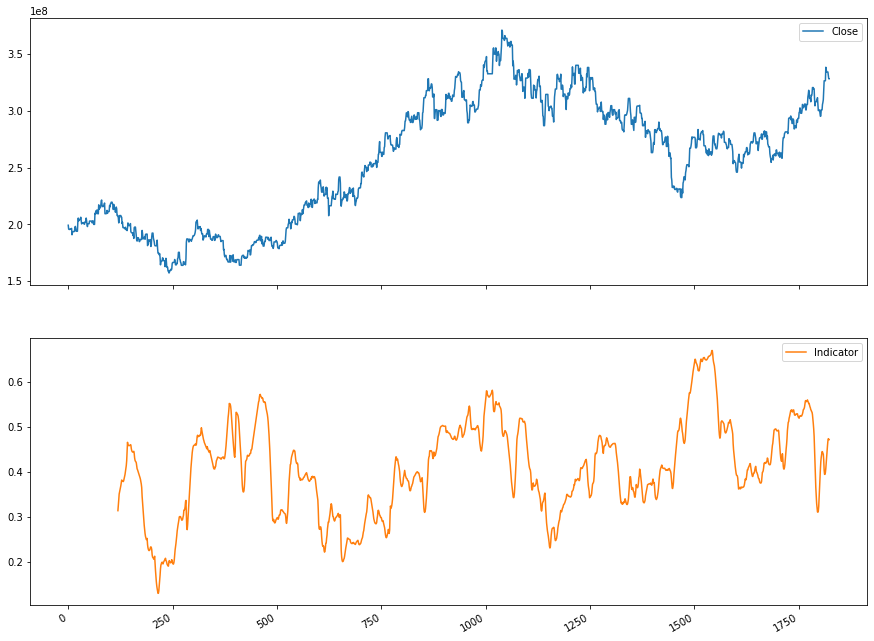

In [357]:
df[['Close', 'Indicator']].plot(subplots=(2,1), figsize=(15,12))

In [347]:
def ma_crossover(df_, a, b):

    df_ = df_[['Close']]
    df_['Close'] = df_['Close'].astype('float64')
    df_['returns'] = np.log(df_[['Close']]).diff().fillna(0)
    
    df_['shift_returns'] = np.log(df_['Close']).diff().shift(-1).fillna(0)
    df_['sma'] = df_['Close'].rolling(a).mean().fillna(0)
    df_['smb'] = df_['Close'].rolling(b).mean().fillna(0)
    df_['signal'] = np.sign(df_.sma-df_.smb).diff().fillna(0)
    df_['sig_up'] = df_['signal'].cumsum().apply(lambda x:x*(x>0))
    df_['sig_dwn'] = df_['signal'].cumsum().apply(lambda x:x*(x<0))
    df_['val'] = df_.returns * df_.sig_up + df_.returns * df_.sig_dwn
    df_['pnls'] = np.cumsum(df_.returns * df_.sig_up + df_.returns * df_.sig_dwn)
    
    return df_

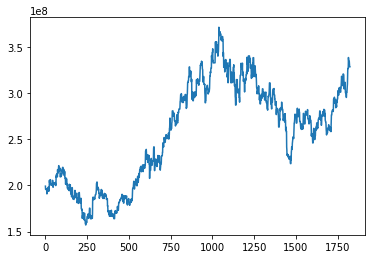

In [351]:
df.Close.plot()

In [348]:
res = ma_crossover(df, 10, 20)

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

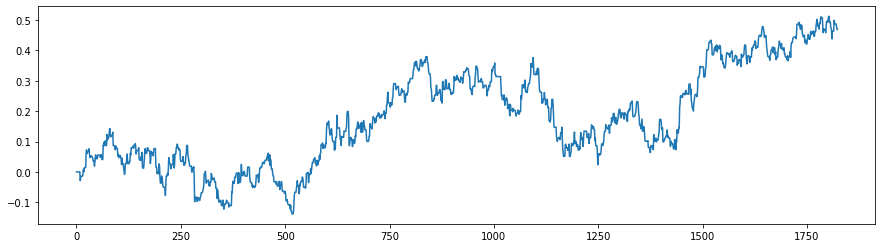

In [349]:
res.pnls.plot(figsize=(15,4))

In [288]:
backtest = Backtest(df, SmaCross, commission=.002)

stats, heatmap = backtest.optimize(
    n1=range(10, 110, 10),
    n2=range(20, 210, 20),
   
    constraint=lambda p: p.n1 < p.n2,
    maximize='Equity Final [$]',
    return_heatmap=True)

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Data index is not datetime. Assuming simple periods.
  """Entry point for launching an IPython kernel.


In [289]:
heatmap.sort_values().iloc[-3:]

n1   n2 
100  200    17852.430777
80   160    18407.641206
     180    18815.207765
dtype: float64

In [290]:
hm = heatmap.groupby(['n1', 'n2']).mean().unstack()
hm

n2,20,40,60,80,100,120,140,160,180,200
n1,,,,,,,,,,
10,4270.660539,6361.613956,5343.748761,6482.669808,10286.940322,8996.520243,8720.098506,8726.809336,6599.435437,7366.935524
20,NaN,6522.864607,8556.925368,8054.586071,7596.070414,9796.969555,8766.954998,9753.680550,7642.981910,8558.147171
30,NaN,8402.395578,10078.961540,7917.035326,9610.560342,10839.637705,8176.230536,9489.280609,9031.654966,7430.315657
40,NaN,NaN,5655.700491,7928.630705,7983.203558,8177.527276,9779.519082,7514.247648,8258.479205,12620.016447
50,NaN,NaN,7796.197813,9528.282547,8344.479339,8833.015550,9879.577276,8284.967460,10831.419270,10021.252197
60,NaN,NaN,NaN,11776.296952,13345.300578,15485.330493,10370.754857,12008.828931,13317.717636,13016.365436
70,NaN,NaN,NaN,13949.512843,11403.314611,10173.111385,12028.827921,13216.226989,17755.286621,14321.324405
80,NaN,NaN,NaN,NaN,9888.120431,10479.359812,13110.015579,18407.641206,18815.207765,15118.541576
90,NaN,NaN,NaN,NaN,12732.028290,12627.330328,16854.927521,15377.696974,12632.712178,14969.442383


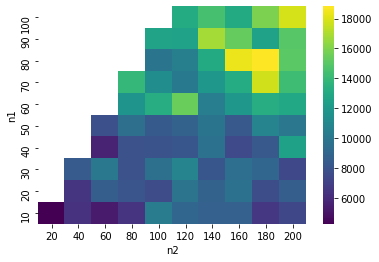

In [291]:
%matplotlib inline

import seaborn as sns


sns.heatmap(hm[::-1], cmap='viridis')

In [292]:
from backtesting.lib import plot_heatmaps


plot_heatmaps(heatmap, agg='mean')

Column(id='2179', ...)